# Fatigue investigation of a 3D printed alloy using the Theory of Critical Distances
## Experiment
The purpose of this research is to study the fatigue life of a 3D printed alloy on specimens with stress raisers using the Theory of Critical Distances. 

3D printing, or additive manufacturing, is the construction of a three-dimensional object from a CAD model or a digital 3D model.  Nowadays, the precision, repeatability, and material range of 3D printing has increased to the point that some 3D printing processes are considered viable as an industrial-production technology. One of the key advantages of 3D printing is the ability to produce very complex shapes or geometries that would be otherwise impossible to construct by hand, including hollow parts or parts with internal truss structures to reduce weight.

The Theory of Critical Distances (TCD) is a design method that is widely used in situations of practical interest to estimate the strength of notched/cracked components subjected to either static, dynamic, or fatigue loading.

The first step is to conduct fatigue experiments using plain and notched specimens (Fig. 1, Table 1).
<p align="center"><img src="Fig1a.png" width="550" title="hover text"></p>
<div align="center">a</div>
<p align="center"><img src="Fig1b.png" width="500" title="hover text"></p>
<div align="center">b</div>
<div align="center">Fig. 1. The plain (a) and notched (b) specimens geometry for fatigue tests (in mm).</div> 
<br>
<div align="center">Table 1. The specimens geometry for fatigue tests.</div>

|      No.    | Notch depth, d (mm) | Notch radius, r (mm) | Notch angle (deg) |
|-------------|:-------------------:|---------------------:|------------------:|
| Not. sp. 1. |          5          |          5           |         45        |
| Not. sp. 2. |          5          |          1           |         45        |
| Not. sp. 3. |          5          |         0.1          |         45        |

After the experimental study, there is fatigue data as an excel sheet "fatigue_data.csv" which contains: the fatigue life or the number of cycles until failure "N_cyc", the maximum fatigue strength or the maximum stress value whereby the failure occurred "S_max_MPa", the load ratio "R", the load frequency "freq_Hz", the notch depth "notch_depth_mm", the notch radius "notch_radius_mm", the notch angle "angle_degree", and the specimen label "label". 

In order to import the fatigue data, one can use pandas' `read_csv()` function.

In [1]:
import pandas as pd
Fatigue_data = pd.read_csv('fatigue_data.csv')
Fatigue_data.head()

,N_cyc,S_max_MPa,S_a_MPa,S_min_MPa,S_m_MPa,R,freq_Hz,angle_degree,notch_depth_mm,notch_radius_mm,label
0,10369,51.0,22.95,5.1,28.05,0.1,6,-,-,-,Plain specimen
1,27918,31.0,13.95,3.1,17.05,0.1,10,-,-,-,Plain specimen
2,2000000,16.0,7.20,1.6,8.80,0.1,30,-,-,-,Plain specimen
3,113990,24.0,10.80,2.4,13.20,0.1,12,-,-,-,Plain specimen
4,324201,18.0,8.10,1.8,9.90,0.1,15,-,-,-,Plain specimen


As one can see from the table, some experiments have 2 million cycles in the "N_cyc" column. It's been reported that the test had been stopped if the specimen had survived 2 million cycles, so we need to add this information to the table.

In [2]:
def results(N):
    if N >= 2000000:
        return "Run out"
    else: return "Failure"

Res = (Fatigue_data['N_cyc'].apply(results))
Fatigue_data = pd.concat([Res.rename('Result'), Fatigue_data], axis=1)

In [3]:
Fatigue_data

,Result,N_cyc,S_max_MPa,S_a_MPa,S_min_MPa,S_m_MPa,R,freq_Hz,angle_degree,notch_depth_mm,notch_radius_mm,label
0,Failure,10369,51.0,22.950,5.10,28.050,0.1,6,-,-,-,Plain specimen
1,Failure,27918,31.0,13.950,3.10,17.050,0.1,10,-,-,-,Plain specimen
2,Run out,2000000,16.0,7.200,1.60,8.800,0.1,30,-,-,-,Plain specimen
3,Failure,113990,24.0,10.800,2.40,13.200,0.1,12,-,-,-,Plain specimen
4,Failure,324201,18.0,8.100,1.80,9.900,0.1,15,-,-,-,Plain specimen
5,Failure,489269,17.0,7.650,1.70,9.350,0.1,20,-,-,-,Plain specimen
6,Run out,2000000,13.5,6.075,1.35,7.425,0.1,25,-,-,-,Plain specimen
7,Run out,2000000,16.8,7.560,1.68,9.240,0.1,30,-,-,-,Plain specimen
8,Failure,560209,17.0,7.650,1.70,9.350,0.1,30,-,-,-,Plain specimen
9,Run out,2000000,14.0,6.300,1.40,7.700,0.1,30,45,5,5,Notched specimen 1


## Fatigue curves
The next step is to plot fatigue curves. At first, let's create the function that splits the fatigue data by a specimen label and fatigue life.

In [4]:
def grouped_sp_lab_N(spec_label, num_cyc):
    '''The function splits the fatigue data according to a specimen label "label" and fatigue life "N_cyc".'''
    grouped_label_fail = Fatigue_data[Fatigue_data['N_cyc'] < num_cyc].groupby("label")
    return grouped_label_fail.get_group(spec_label)

It is known that fatigue curves are described by the power-law: 
\begin{equation} y=ax^{b} \end{equation} 
In order to obtain the power function, one can use `curve_fit` from `scipy.optimize`. 

In [5]:
from scipy.optimize import curve_fit

def line_fun(x, a, b):
    return a+b*x

def pow_fun(X, Y):
    '''The function determines fit parameters and standard deviations 
    a, b, stdev_lg_a, and stdev_b for a power function y=ax^b.'''
    coefficients = {}
    [lg_a, b], cov = curve_fit(f=line_fun, xdata=X, ydata=Y, p0=[0, 0], bounds=(-np.inf, np.inf))
    [stdev_lg_a, stdev_b] = np.sqrt(np.diag(cov))
    a = 10**(lg_a)    
    coefficients = [a, b, stdev_lg_a, stdev_b]
    sns.lineplot(np.arange(10**X.min(), 10**X.max()+(10**X.max()-10**X.min())/20, (10**X.max()-10**X.min())/20), 
                 a*((np.arange(10**X.min(), 10**X.max()+(10**X.max()-10**X.min())/20, (10**X.max()-10**X.min())/20))**b))
    return coefficients

Then to plot graphs, we need `matplotlib` and `seaborn`. 

{'Plain specimen': [650.9936488603486,
  -0.2848181877349861,
  0.20402149103131395,
  0.04258008391301792],
 'Notched specimen 1': [132.40984761485404,
  -0.17355278383560552,
  0.2534158665287514,
  0.04810953945984392],
 'Notched specimen 2': [254.91106865198591,
  -0.26052944137916123,
  0.5155821721952527,
  0.09865952319146225],
 'Notched specimen 3': [423.8229694079015,
  -0.3234760146732134,
  0.2541810817725727,
  0.049786260209029716]}

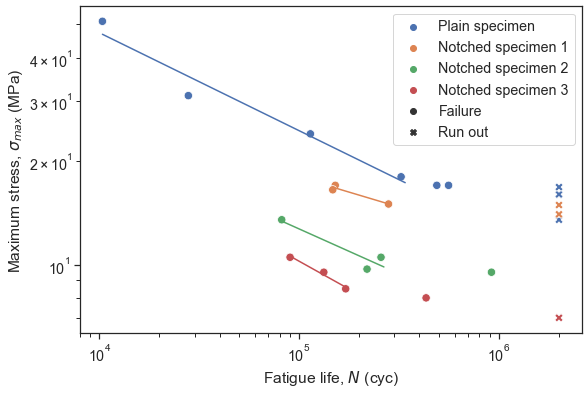

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3)
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(9, 6))
ax.set(xscale="log", yscale="log")

# Supposed intersection point
sup_inter_p = 400000

# Fatigue scatter plot
sns.scatterplot(x=Fatigue_data['N_cyc'], y=Fatigue_data['S_max_MPa'], hue=np.array(Fatigue_data['label']), 
               style=np.array(Fatigue_data['Result']), s=70)

# Approximation of the scatter plot by the power function y=ax^b.
pow_func_param = {}
for spec_label in Fatigue_data['label'].unique():
    grouped_table = grouped_sp_lab_N(spec_label, sup_inter_p)
    X = np.log10(grouped_table['N_cyc'])
    Y = np.log10(grouped_table['S_max_MPa'])        
    pow_func_param[spec_label] = pow_fun(X, Y)
       

plt.xlabel("Fatigue life, $N$ (cyc)")
plt.ylabel("Maximum stress, $σ_{max}$ (MPa)")

# Parameters and standard deviations of power functions
pow_func_param

From the graph, one can see that, for the plain specimen after about 400,000 cycles, the slope of the line changes and the fatigue limit is observed,  i.e. the maximum stress does not change significantly. Assume that the fatigue limit for 2 million cycles is the maximum 'run out' point. So we can draw a curve through this point and points after 400,000 cycles. Then we can find the intersection point of 2 lines and describe all the fatigue data for the plain specimen.

In [7]:
def grouped_sp_lab_N_range(spec_label, N_sup_int):
    '''The function splits the fatigue data according to a specimen label and a fatigue life range 
    (from N_sup_int to 'run out' cycles or equal to 'run out' cycles with the maximum value of stress 'S_max_MPa').''' 
    dict_sp = {}
    # We group the fatigue data by 'spec_label' and 'Result' 
    grouped_label_lim = Fatigue_data[Fatigue_data['Result'] == 'Run out'].groupby("label")
    sp_lim_table = grouped_label_lim.get_group(spec_label)
    
    # Indexes for which the fatigue life is between N_sup_int and 'run out' cycles
    lim_data = (Fatigue_data['Result'] == 'Failure') == (Fatigue_data['N_cyc'] > N_sup_int)
    # We change one index from False to True for a 'run out' specimen with the maximum value of stress 'S_max_MPa' 
    lim_data[sp_lim_table['S_max_MPa'].idxmax(axis = 0)] = True
    
    # We group the fatigue data by 'spec_label'
    grouped_label = Fatigue_data[lim_data].groupby("label")
    sp_table = grouped_label.get_group(spec_label)
    dict_sp[spec_label] = list(sp_table.index)
    return sp_table

pl_sp_table = grouped_sp_lab_N_range('Plain specimen', sup_inter_p)
pl_sp_table

,Result,N_cyc,S_max_MPa,S_a_MPa,S_min_MPa,S_m_MPa,R,freq_Hz,angle_degree,notch_depth_mm,notch_radius_mm,label
5,Failure,489269,17.0,7.65,1.70,9.35,0.1,20,-,-,-,Plain specimen
7,Run out,2000000,16.8,7.56,1.68,9.24,0.1,30,-,-,-,Plain specimen
8,Failure,560209,17.0,7.65,1.70,9.35,0.1,30,-,-,-,Plain specimen


In [8]:
# Parameters and standard deviations of power functions for the plain specimen
X_lim = np.log10(pl_sp_table['N_cyc'])
Y_lim = np.log10(pl_sp_table['S_max_MPa'])
[lg_a_2, b_2], cov = curve_fit(f=line_fun, xdata=X_lim, ydata=Y_lim, p0=[0, 0], bounds=(-np.inf, np.inf))
[stdev_lg_a_2, stdev_b_2] = np.sqrt(np.diag(cov))
a_2 = 10**(lg_a_2)

a_1 = pow_func_param['Plain specimen'][0]
b_1 = pow_func_param['Plain specimen'][1]

# The intersection point of 2 curves
N_inter = (a_1/a_2)**(1/(b_2 - b_1))
print('The number of cycles that corresponds to the intersection of 2 fatigue curves: {} cycles'.format(int(N_inter)))

The number of cycles that corresponds to the intersection of 2 fatigue curves: 357544 cycles


As we can see, our assumption of about 400,000 cycles was correct. So, let's plot these fatigue curves for the plain specimen.

Text(0, 0.5, 'Maximum stress, $σ_{max}$ (MPa)')

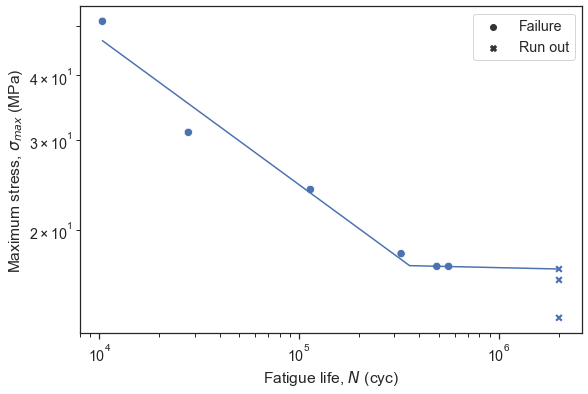

In [9]:
def grouped_by_spec_lab(File_name, spec_label):
    '''The function splits the fatigue data according to a specimen label'''
    grouped_by_spec = File_name.groupby("label")
    return grouped_by_spec.get_group(spec_label)

# We group the fatigue data by 'Plain specimen'
pl_sp_table = grouped_by_spec_lab(Fatigue_data, 'Plain specimen')

sns.set(font_scale=1.3)
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(9, 6))
ax.set(xscale="log", yscale="log")
    
# Scatter plot for the plain specimen
sns.scatterplot(x=pl_sp_table['N_cyc'], y=pl_sp_table['S_max_MPa'], style=np.array(pl_sp_table['Result']), s=70)
# The first fatigue curve 
sns.lineplot(np.arange(pl_sp_table['N_cyc'].min(), N_inter+(N_inter-pl_sp_table['N_cyc'].min())/20, 
                    (N_inter-pl_sp_table['N_cyc'].min())/20), 
                    a_1*((np.arange(pl_sp_table['N_cyc'].min(), N_inter+(N_inter-pl_sp_table['N_cyc'].min())/20, 
                    (N_inter-pl_sp_table['N_cyc'].min())/20))**b_1), color='b')
# The second fatigue curve
sns.lineplot(np.arange(N_inter, pl_sp_table['N_cyc'].max()+(pl_sp_table['N_cyc'].max()-N_inter)/20,
                    (pl_sp_table['N_cyc'].max()-N_inter)/20),
             a_2*((np.arange(N_inter, pl_sp_table['N_cyc'].max()+(pl_sp_table['N_cyc'].max()-N_inter)/20,
                            (pl_sp_table['N_cyc'].max()-N_inter)/20))**b_2), color='b')

plt.xlabel("Fatigue life, $N$ (cyc)")
plt.ylabel("Maximum stress, $σ_{max}$ (MPa)")

## Determination of the critical distance
The TCD method was proposed successfully by Tanaka and Taylor on the basis of linear elastic fracture mechanics (LEFM). The average stress of a characteristic point or line in the vicinity of the notch is considered in TCD. Failure occurs when the average stress within the distance range from the notch tip exceeds the strength of materials. According to the topology type, TCD can be divided into the following categories, as shown in Figure 2.
<p align="center"><img src="Fig2.png" width="500" title="hover text"></p>
<div align="center">Figure 2. Different forms of TCD.</div>
<br>
<div align="center">The Point Method (PM):</div>
\begin{equation} \sigma_{eff}=\sigma_0 \end{equation}

\begin{equation} \sigma_{eff}=\sigma_y(\theta=0, r=L/2) \end{equation}
<p>$\sigma_y(r)$ is a stress-distance discrete curve for the notched specimen. This curve can be obtained by Finite Element Analysis (Ansys, Abaqus, and so on). $\sigma_0$ is the ultimate strength for the plain specimen (without a notch). L is the critical distance. The purpose is to find L/2 which is the intersection point of $\sigma_{eff}$ and $\sigma_y(r)$.</p>

<div align="center">The Line Method (LM):</div>
$$\sigma_{eff}=\sigma_0$$

$$\sigma_{eff}=\frac1L\int_0^{2L} \sigma_y(\theta=0, r) \,dr$$

The purpose is to find 2L.

Let's find the critical distance L for all the experimental points for notched specimens according to the line and point method.

So we have stress-distance discrete curves for the notched specimens as the file "stress_distance_curves". This file contains the distance from the notch root $r$ "Length_m", the stress distribution near the notch $\sigma_y$ "MaxPrSt_Pa", and the nominal stress $\sigma_{nom}$ "s_MPa" for all notched specimen geometries. If  $\sigma_{nom}$ is changed,  $\sigma_y$ is changed proportionally because we use the linear elastic model. $\sigma_{nom}$ corresponds to "S_max_MPa" from the table "Fatigue_data" for notched specimens. Thus in order to obtain $\sigma_y$, we should pick "s_MPa" according to "S_max_MPa" for observed fatigue life "N_cyc". Then we need to use this fatigue life "N_cyc" to obtain the maximum stress value using the fatigue curve equations for the plain specimen (our power functions). This maximum stress value corresponds to $\sigma_0$. Using $\sigma_y$ and $\sigma_0$ we can find the critical distance. Doing that we should calculate critical distance values for all the points apart from "run out" ones.

In [10]:
def grouped_sp_lab_fail(spec_label):
    '''The function splits the fatigue data (without "run out" points) according to a specimen label.'''
    grouped_label_fail = Fatigue_data[Fatigue_data['Result'] == 'Failure'].groupby("label")
    return grouped_label_fail.get_group(spec_label)

In [11]:
# Stress-distance curves for the notched specimens.
stress_distance_curves = pd.read_csv('stress_distance_curves.csv')

# Number of failed notched specimens.
Num_fail_n_sp = len(Fatigue_data.groupby("Result").get_group('Failure')) - len(grouped_sp_lab_fail("Plain specimen"))

Cr_Dis_Result = {}

label_of_sp = ['' for n in range(Num_fail_n_sp)]
Kt = [0.0 for n in range(Num_fail_n_sp)] # Stress concentration factor (Kt)
L_PM_mm = [0.0 for n in range(Num_fail_n_sp)]
S_exp_MPa = [0.0 for n in range(Num_fail_n_sp)]
N_cyc = [0.0 for n in range(Num_fail_n_sp)]
S_0_MPa = [0.0 for n in range(Num_fail_n_sp)]
angle_degree = [0.0 for n in range(Num_fail_n_sp)]
notch_depth_mm = [0.0 for n in range(Num_fail_n_sp)]
notch_radius_mm = [0.0 for n in range(Num_fail_n_sp)]
L_LM_mm = [0.0 for n in range(Num_fail_n_sp)]

k = 0
t = 0
while k < len(stress_distance_curves.columns):
    Len = stress_distance_curves[stress_distance_curves.columns[k]].dropna()
    Sig = stress_distance_curves[stress_distance_curves.columns[k+1]].dropna()
    Geom = stress_distance_curves[stress_distance_curves.columns[k+2]].dropna()
    
    # We group the fatigue data by the specimen label
    specimen_label = stress_distance_curves[stress_distance_curves.columns[k+2]][7]
    sp_table = grouped_sp_lab_fail(specimen_label)
       
    for i in list(sp_table.index):
        # Experimental fatigue life and stress for a notched specimen
        S_MPa = sp_table['S_max_MPa'][i]
        N_ns = sp_table['N_cyc'][i]
        # Corrected values of the stress distribution near the notch 'σ𝑦'.
        Sig_cor = Sig*S_MPa/float(Geom[0])
        # The maximum stress value for the plain specimen 'σ0'.
        if N_ns > N_inter:
            Sigma_0 = a_2*N_ns**b_2
        else:
            Sigma_0 = a_1*N_ns**b_1        
        
        j = 0
        while Sig_cor[j] > Sigma_0*1000000:
            j += 1
        
        # Critical distance value (in mm) according to the point method.
        if j == 0:
            Critical_distance_PM = 0.0
        else:
            Critical_distance_PM = (Len[j]+(Len[j-1] - Len[j])*(Sigma_0*1000000-Sig_cor[j])/(Sig_cor[j-1]-Sig_cor[j]))*2000
        
        Kt[t] = (float(Sig_cor[0]) / 1000000 / S_MPa).round(2)     
        label_of_sp[t] = specimen_label
        L_PM_mm[t] = Critical_distance_PM.__round__(3)
        S_exp_MPa[t] = S_MPa.round(1)
        N_cyc[t] = int(N_ns)
        S_0_MPa[t] = Sigma_0.round(1)
        angle_degree[t] = Geom[2]
        notch_depth_mm[t] = Geom[4]
        notch_radius_mm[t] = Geom[6]
        
        # Sigma is calculated according to the area below the stress-distance curve 'stress_distance_curve'
        Sigma = np.array([[0]])
        a = 1
        while (Sigma[a-1] * Len[a-1] + (Sig_cor[a-1] + Sig_cor[a]) / 2*(Len[a] - Len[a-1])) / Len[a] > Sigma_0*1000000:
            Sigma = np.append(Sigma, [(Sigma[a-1]*Len[a-1]+(Sig_cor[a-1]+Sig_cor[a])/2*(Len[a] - Len[a-1]))/Len[a]], axis=0)
            a += 1
        
        # Critical distance value (in mm) according to the line method.
        Critical_distance_LM = (-(Sig_cor[a-1]/2 - 0.5*(Len[a]*(Sig_cor[a-1] - Sig_cor[a])/(Len[a-1]-Len[a])-Sig_cor[a]) -
                Len[a-1] / 2 * ((Sig_cor[a-1] - Sig_cor[a]) / (Len[a-1] - Len[a])) - Sigma_0*1000000) -
                 ((Sig_cor[a-1] / 2 - 0.5 * (Len[a] * (Sig_cor[a-1] - Sig_cor[a]) / (Len[a-1] - Len[a]) - Sig_cor[a]) -
                   Len[a-1] / 2 * ((Sig_cor[a-1] - Sig_cor[a]) / (Len[a-1] - Len[a])) - Sigma_0*1000000) ** 2 -
                  4 * (0.5 * (Sig_cor[a-1] - Sig_cor[a]) / (Len[a-1] - Len[a])) * (Sigma[a-1] * Len[a-1] -
                  0.5 * Sig_cor[a-1] * Len[a-1] + 0.5 * Len[a-1] * (Len[a] * (Sig_cor[a-1] - Sig_cor[a]) / (Len[a-1] -
                  Len[a]) - Sig_cor[a]))) ** 0.5) / 2 / (0.5 * (Sig_cor[a-1] - Sig_cor[a]) / (Len[a-1] - Len[a])) / 2 * 1000
        
        L_LM_mm[t] = float(Critical_distance_LM).__round__(3)
        
        t += 1
    k += 3
    
Cr_Dis_Result['N_cyc'] = N_cyc
Cr_Dis_Result['S_exp_MPa'] = S_exp_MPa
Cr_Dis_Result['L_PM_mm'] = L_PM_mm
Cr_Dis_Result['L_LM_mm'] = L_LM_mm
Cr_Dis_Result['Kt'] = Kt
Cr_Dis_Result['S_0_MPa'] = S_0_MPa
Cr_Dis_Result['angle_degree'] = angle_degree
Cr_Dis_Result['notch_depth_mm'] = notch_depth_mm
Cr_Dis_Result['notch_radius_mm'] = notch_radius_mm
Cr_Dis_Result['label'] = label_of_sp

Cr_Dis_Result = pd.DataFrame(Cr_Dis_Result)

# We remove all the critical distance values that are less than or equal to 0 as outliers.
Cr_Dis_Result = Cr_Dis_Result[Cr_Dis_Result['L_LM_mm'] > 0].dropna()
Cr_Dis_Result = Cr_Dis_Result[Cr_Dis_Result['L_PM_mm'] > 0].dropna()

In [12]:
Cr_Dis_Result

,N_cyc,S_exp_MPa,L_PM_mm,L_LM_mm,Kt,S_0_MPa,angle_degree,notch_depth_mm,notch_radius_mm,label
0,151801,17.0,0.124,0.062,1.31,21.8,45,5,5,Notched specimen 1
2,280405,15.0,0.422,0.218,1.31,18.3,45,5,5,Notched specimen 1
3,81888,13.5,0.205,0.110,2.30,26.0,45,5,1,Notched specimen 2
4,257181,10.5,0.305,0.168,2.30,18.7,45,5,1,Notched specimen 2
5,918573,9.5,0.308,0.169,2.30,16.9,45,5,1,Notched specimen 2
6,218929,9.7,0.145,0.075,2.30,19.6,45,5,1,Notched specimen 2
7,90171,10.5,0.222,0.175,6.69,25.3,45,5,0.1,Notched specimen 3
8,133020,9.5,0.228,0.179,6.69,22.6,45,5,0.1,Notched specimen 3
9,171199,8.5,0.208,0.164,6.69,21.0,45,5,0.1,Notched specimen 3
10,432455,8.0,0.282,0.229,6.69,17.0,45,5,0.1,Notched specimen 3


In the table above, 'S_exp_MPa' id the maximum nominal stress for a notched specimen, and 'S_0_MPa' is the maximum nominal stress for a plain specimen under an observed fatigue life 'N_cyc'.

The next step is to plot relationship diagrams between fatigue lives and critical distances and describe it by a power function.

Text(0, 0.5, 'Critical distance, $L$ (mm)')

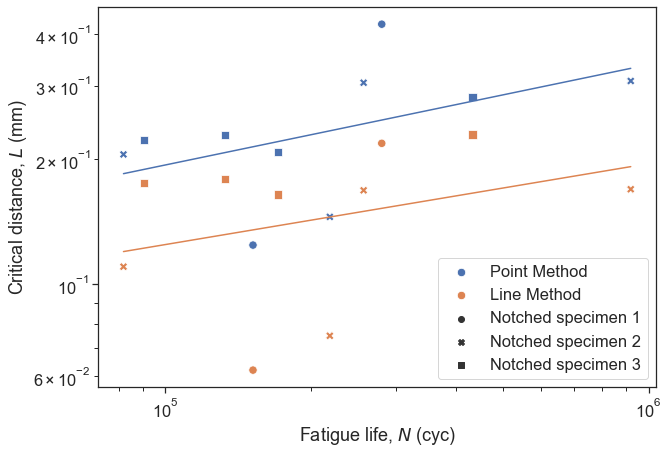

In [13]:
sns.set(font_scale=1.5)
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(10, 7))
ax.set(xscale="log", yscale="log")
    
# Diagrams between fatigue lives and critical distances
sns.scatterplot(x=Cr_Dis_Result['N_cyc'], y=Cr_Dis_Result['L_PM_mm'], s=70, label="Point Method", 
            style=np.array(Cr_Dis_Result['label']), legend=False)
sns.scatterplot(x=Cr_Dis_Result['N_cyc'], y=Cr_Dis_Result['L_LM_mm'], s=70, label="Line Method",
           style=np.array(Cr_Dis_Result['label']))

# Parameters and standard deviations of power functions
a_PM, b_PM, stdev_lg_a_PM, stdev_b_PM = pow_fun(np.log10(Cr_Dis_Result['N_cyc']), np.log10(Cr_Dis_Result['L_PM_mm']))
a_LM, b_LM, stdev_lg_a_LM, stdev_b_LM = pow_fun(np.log10(Cr_Dis_Result['N_cyc']), np.log10(Cr_Dis_Result['L_LM_mm']))

plt.xlabel("Fatigue life, $N$ (cyc)")
plt.ylabel("Critical distance, $L$ (mm)")

In [14]:
print('The power function parameter b = {} and its standard deviation = {} according to the Point Method.'
      .format(b_PM.round(3), stdev_b_PM.round(3)))
print('The power function parameter b = {} and its standard deviation = {} according to the Line Method.'
      .format(b_LM.round(3), stdev_b_LM.round(3)))

The power function parameter b = 0.242 and its standard deviation = 0.155 according to the Point Method.
The power function parameter b = 0.195 and its standard deviation = 0.202 according to the Line Method.


As we can see from the power function parameters and their standard deviations, there is no statistically significant relationship between fatigue lives and critical distances for the observed range of fatigue life. Therefore, we can neglect this change.

According to recommendations from the literature, the critical distance should be calculated using the stress for plane specimen and specimen with the notch as sharp as possible. In this research, it is the specimen with a notch radius of 0.1 mm.  So let's calculate the average critical distance for this specimen. 

In [15]:
# We group the fatigue data by 'Notched specimen 3'
n_sp3_table = grouped_by_spec_lab(Cr_Dis_Result, 'Notched specimen 3')
n_sp3_table

,N_cyc,S_exp_MPa,L_PM_mm,L_LM_mm,Kt,S_0_MPa,angle_degree,notch_depth_mm,notch_radius_mm,label
7,90171,10.5,0.222,0.175,6.69,25.3,45,5,0.1,Notched specimen 3
8,133020,9.5,0.228,0.179,6.69,22.6,45,5,0.1,Notched specimen 3
9,171199,8.5,0.208,0.164,6.69,21.0,45,5,0.1,Notched specimen 3
10,432455,8.0,0.282,0.229,6.69,17.0,45,5,0.1,Notched specimen 3


Text(0, 0.5, 'Critical distance, $L$ (mm)')

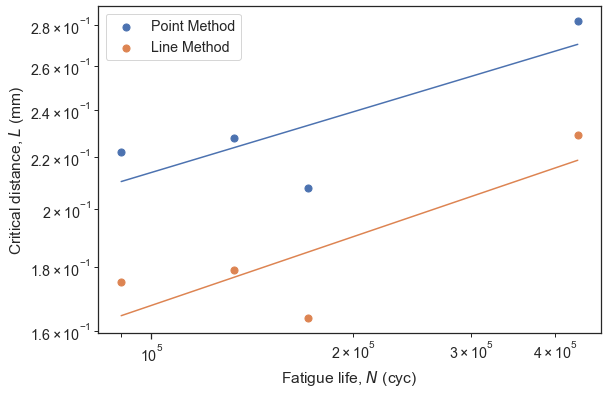

In [16]:
sns.set(font_scale=1.3)
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(9, 6))
ax.set(xscale="log", yscale="log")
    
# Diagrams between fatigue lives and critical distances
plt.scatter(x=n_sp3_table['N_cyc'], y=n_sp3_table['L_PM_mm'], s=50, label="Point Method")
plt.scatter(x=n_sp3_table['N_cyc'], y=n_sp3_table['L_LM_mm'], s=50, label="Line Method")

# Parameters and standard deviations of power functions
a_PM_NS3,b_PM_NS3,stdev_lg_a_PM_NS3,stdev_b_PM_NS3 = pow_fun(np.log10(n_sp3_table['N_cyc']), np.log10(n_sp3_table['L_PM_mm']))
a_LM_NS3,b_LM_NS3,stdev_lg_a_LM_NS3,stdev_b_LM_NS3 = pow_fun(np.log10(n_sp3_table['N_cyc']), np.log10(n_sp3_table['L_LM_mm']))

plt.xlabel("Fatigue life, $N$ (cyc)")
plt.ylabel("Critical distance, $L$ (mm)")

In [17]:
print('The power function parameter b = {} and its standard deviation = {} according to the Point Method.'
      .format(b_PM_NS3.round(3), stdev_b_PM_NS3.round(3)))
print('The power function parameter b = {} and its standard deviation = {} according to the Line Method.'
      .format(b_LM_NS3.round(3), stdev_b_LM_NS3.round(3)))

The power function parameter b = 0.16 and its standard deviation = 0.082 according to the Point Method.
The power function parameter b = 0.181 and its standard deviation = 0.088 according to the Line Method.


In [18]:
# The average critical distance
L_PM = n_sp3_table['L_PM_mm'].mean()
L_LM = n_sp3_table['L_LM_mm'].mean()
print('The critical distance according to the PM: {} mm, and LM: {} mm'.format(L_PM.__round__(3), L_LM.__round__(3)))

The critical distance according to the PM: 0.235 mm, and LM: 0.187 mm


# Fatigue strength prediction
The next step is to predict the fatigue strength using these critical distances. At first, let's create a spreadsheet with data.

In [19]:
Pred_Result = {}

Pred_Result['N_cyc'] = N_cyc
Pred_Result['S_exp_MPa'] = S_exp_MPa
Pred_Result['L_PM_mm'] = [L_PM for n in range(Num_fail_n_sp)]
Pred_Result['L_LM_mm'] = [L_LM for n in range(Num_fail_n_sp)]
Pred_Result['Kt'] = Kt
Pred_Result['S_0_MPa'] = S_0_MPa
Pred_Result['angle_degree'] = angle_degree
Pred_Result['notch_depth_mm'] = notch_depth_mm
Pred_Result['notch_radius_mm'] = notch_radius_mm
Pred_Result['label'] = label_of_sp

Pred_Result = pd.DataFrame(Pred_Result)

In [20]:
Pred_Result

,N_cyc,S_exp_MPa,L_PM_mm,L_LM_mm,Kt,S_0_MPa,angle_degree,notch_depth_mm,notch_radius_mm,label
0,151801,17.0,0.235,0.18675,1.31,21.8,45,5,5,Notched specimen 1
1,147452,16.5,0.235,0.18675,1.31,22.0,45,5,5,Notched specimen 1
2,280405,15.0,0.235,0.18675,1.31,18.3,45,5,5,Notched specimen 1
3,81888,13.5,0.235,0.18675,2.30,26.0,45,5,1,Notched specimen 2
4,257181,10.5,0.235,0.18675,2.30,18.7,45,5,1,Notched specimen 2
5,918573,9.5,0.235,0.18675,2.30,16.9,45,5,1,Notched specimen 2
6,218929,9.7,0.235,0.18675,2.30,19.6,45,5,1,Notched specimen 2
7,90171,10.5,0.235,0.18675,6.69,25.3,45,5,0.1,Notched specimen 3
8,133020,9.5,0.235,0.18675,6.69,22.6,45,5,0.1,Notched specimen 3
9,171199,8.5,0.235,0.18675,6.69,21.0,45,5,0.1,Notched specimen 3


After that, one can calculate fatigue strength values for notched specimens according to the PM 'S_pr_PM_MPa' and LM 'S_pr_LM_MPa' using critical distance values 'L_PM_mm and L_LM_mm', the stress for the plain specimen 'S_0_MPa' and stress-distance curves for the notched specimens 'stress_distance_curves'.

In [21]:
def predictor(result_data):
    S_pr_PM_MPa = [0.0 for n in range(len(result_data))]
    S_pr_LM_MPa = [0.0 for n in range(len(result_data))]

    k = 0
    while k < len(stress_distance_curves.columns):
        Len = stress_distance_curves[stress_distance_curves.columns[k]].dropna()
        Sig = stress_distance_curves[stress_distance_curves.columns[k+1]].dropna()
        Geom = stress_distance_curves[stress_distance_curves.columns[k+2]].dropna()

        # We group the fatigue data by the specimen label
        specimen_label = stress_distance_curves[stress_distance_curves.columns[k+2]][7]
        spec_table = grouped_by_spec_lab(result_data, specimen_label)

        for i in list(spec_table.index):

            j = 0
            while Len[j] < L_PM/2/1000:
                j += 1

            # Calculated stress under L/2 using stress-distance curves for the notched specimens [sigma_y(L/2)].
            Sigma_L_PM = L_PM/2/1000 * (Sig[j-1] - Sig[j]) / (Len[j-1] - Len[j]) - Len[j] \
                            * (Sig[j-1] - Sig[j]) / (Len[j-1] - Len[j]) + Sig[j]

            # Predicted fatigue strength for notched specimens according to the Point Method.
            Sigma_pr_PM = float(Geom[0]) * result_data['S_0_MPa'][i]*1000000 / Sigma_L_PM #(MPa)

            S_pr_PM_MPa[i] = Sigma_pr_PM.__round__(1)

            a = 0
            while Len[a] < L_LM*2/1000:
                a += 1
            # Calculated stress under 2L using stress-distance curves for the notched specimens [sigma(2L)].
            Sigma_2L_LM = L_LM*2/1000 * (Sig[a - 1] - Sig[a]) / (Len[a - 1] - Len[a]) - Len[a] \
                         * (Sig[a - 1] - Sig[a]) / (Len[a - 1] - Len[a]) + Sig[a]

            Sigma_LM = np.array([[0]])
            b = 1
            while Len[b] < (L_LM*2/1000):
                Sigma_LM = np.append(Sigma_LM, [(Sigma_LM[b-1] * Len[b-1] +
                                    (Sig[b-1] + Sig[b]) / 2 * (Len[b] - Len[b-1])) / Len[b]], axis=0)
                b += 1

            # Calculated stress according to the area below a stress-distance curve (from 0 to 2L).
            Sigma_LM = float((Sigma_LM[b-1] * Len[b-1] + (Sig[b-1] + Sigma_2L_LM) / 2 *
                           (L_LM*2/1000 - Len[b-1])) / (L_LM*2/1000))

            # Predicted fatigue strength for notched specimens according to the Line Method.
            Sigma_pr_LM = float(Geom[0]) * result_data['S_0_MPa'][i]*1000000 / Sigma_LM  #(MPa)

            S_pr_LM_MPa[i] = Sigma_pr_LM.__round__(1)
        k += 3
    return S_pr_PM_MPa, S_pr_LM_MPa 

S_pr_PM_MPa, S_pr_LM_MPa = predictor(Pred_Result)

Pred_Result.insert(2, 'S_pr_PM_MPa', S_pr_PM_MPa, True)
Pred_Result.insert(3, 'S_pr_LM_MPa', S_pr_LM_MPa, True)
Pred_Result

,N_cyc,S_exp_MPa,S_pr_PM_MPa,S_pr_LM_MPa,L_PM_mm,L_LM_mm,Kt,S_0_MPa,angle_degree,notch_depth_mm,notch_radius_mm,label
0,151801,17.0,17.4,17.7,0.235,0.18675,1.31,21.8,45,5,5,Notched specimen 1
1,147452,16.5,17.5,17.9,0.235,0.18675,1.31,22.0,45,5,5,Notched specimen 1
2,280405,15.0,14.6,14.9,0.235,0.18675,1.31,18.3,45,5,5,Notched specimen 1
3,81888,13.5,13.8,14.9,0.235,0.18675,2.30,26.0,45,5,1,Notched specimen 2
4,257181,10.5,9.9,10.7,0.235,0.18675,2.30,18.7,45,5,1,Notched specimen 2
5,918573,9.5,9.0,9.7,0.235,0.18675,2.30,16.9,45,5,1,Notched specimen 2
6,218929,9.7,10.4,11.2,0.235,0.18675,2.30,19.6,45,5,1,Notched specimen 2
7,90171,10.5,10.8,10.8,0.235,0.18675,6.69,25.3,45,5,0.1,Notched specimen 3
8,133020,9.5,9.6,9.7,0.235,0.18675,6.69,22.6,45,5,0.1,Notched specimen 3
9,171199,8.5,8.9,9.0,0.235,0.18675,6.69,21.0,45,5,0.1,Notched specimen 3


Then, let's calculate errors for the PM and LM: $$Error=\frac{\sigma_{pr}-\sigma_{exp}}{\sigma_{exp}}\ 100$$

In [22]:
Error_PM = (Pred_Result['S_pr_PM_MPa'] - Pred_Result['S_exp_MPa']) / Pred_Result['S_exp_MPa'] * 100 #(%)
Error_LM = (Pred_Result['S_pr_LM_MPa'] - Pred_Result['S_exp_MPa']) / Pred_Result['S_exp_MPa'] * 100 #(%)

Pred_Result.insert(4, 'Error_PM_%', Error_PM.round(1), True)
Pred_Result.insert(5, 'Error_LM_%', Error_LM.round(1), True)
Pred_Result

,N_cyc,S_exp_MPa,S_pr_PM_MPa,S_pr_LM_MPa,Error_PM_%,Error_LM_%,L_PM_mm,L_LM_mm,Kt,S_0_MPa,angle_degree,notch_depth_mm,notch_radius_mm,label
0,151801,17.0,17.4,17.7,2.4,4.1,0.235,0.18675,1.31,21.8,45,5,5,Notched specimen 1
1,147452,16.5,17.5,17.9,6.1,8.5,0.235,0.18675,1.31,22.0,45,5,5,Notched specimen 1
2,280405,15.0,14.6,14.9,-2.7,-0.7,0.235,0.18675,1.31,18.3,45,5,5,Notched specimen 1
3,81888,13.5,13.8,14.9,2.2,10.4,0.235,0.18675,2.30,26.0,45,5,1,Notched specimen 2
4,257181,10.5,9.9,10.7,-5.7,1.9,0.235,0.18675,2.30,18.7,45,5,1,Notched specimen 2
5,918573,9.5,9.0,9.7,-5.3,2.1,0.235,0.18675,2.30,16.9,45,5,1,Notched specimen 2
6,218929,9.7,10.4,11.2,7.2,15.5,0.235,0.18675,2.30,19.6,45,5,1,Notched specimen 2
7,90171,10.5,10.8,10.8,2.9,2.9,0.235,0.18675,6.69,25.3,45,5,0.1,Notched specimen 3
8,133020,9.5,9.6,9.7,1.1,2.1,0.235,0.18675,6.69,22.6,45,5,0.1,Notched specimen 3
9,171199,8.5,8.9,9.0,4.7,5.9,0.235,0.18675,6.69,21.0,45,5,0.1,Notched specimen 3


In [23]:
print('The maximum absolute prediction error according to the PM: {} %'.format(Pred_Result['Error_PM_%'].abs().max()))
print('The maximum absolute prediction error according to the LM: {} %'.format(Pred_Result['Error_LM_%'].abs().max()))

The maximum absolute prediction error according to the PM: 10.0 %
The maximum absolute prediction error according to the LM: 15.5 %


In [24]:
for label_sp in Pred_Result['label'].unique():
    print('The maximum absolute prediction error for the {} (Kt = {}) \naccording to the PM and LM respectively: {} % and {} %'
          .format(label_sp, grouped_by_spec_lab(Pred_Result, label_sp)['Kt'].mean(), 
                  grouped_by_spec_lab(Pred_Result, label_sp)['Error_PM_%'].abs().max(),
                 grouped_by_spec_lab(Pred_Result, label_sp)['Error_LM_%'].abs().max()))

The maximum absolute prediction error for the Notched specimen 1 (Kt = 1.31) 
according to the PM and LM respectively: 6.1 % and 8.5 %
The maximum absolute prediction error for the Notched specimen 2 (Kt = 2.3) 
according to the PM and LM respectively: 7.2 % and 15.5 %
The maximum absolute prediction error for the Notched specimen 3 (Kt = 6.69) 
according to the PM and LM respectively: 10.0 % and 8.8 %


The standard error of the estimate in terms of the logarithmic scale:

\begin{equation} SEE=\sqrt{\frac{\sum\limits_{i=1}^{\ n} (log(\sigma_{exp}/\sigma_{pr}))^2}{n-2}\ } \end{equation}

In [25]:
# The standard error of the estimate in terms of the logarithmic scale
SEE_PM = ((np.log10(Pred_Result['S_exp_MPa']/Pred_Result['S_pr_PM_MPa'])**2).sum() / (len(Pred_Result)-2))**0.5
(10**(1+SEE_PM)/10).__round__(3)
SEE_LM = ((np.log10(Pred_Result['S_exp_MPa']/Pred_Result['S_pr_LM_MPa'])**2).sum() / (len(Pred_Result)-2))**0.5
(10**(1+SEE_LM)/10).__round__(3)

print('The standard error of the estimate according to the PM: {} or a factor of ±{}'
      .format(SEE_PM.round(3), (10**(1+SEE_PM)/10).round(3)))
print('The standard error of the estimate according to the LM: {} or a factor of ±{}'
      .format(SEE_LM.round(3), (10**(1+SEE_LM)/10).round(3)))

The standard error of the estimate according to the PM: 0.025 or a factor of ±1.06
The standard error of the estimate according to the LM: 0.033 or a factor of ±1.079


The last step is to plot predicted curves according to the PM and LM to compare them with experimental fatigue data.

In [26]:
N_min = Fatigue_data['N_cyc'].min()
N_max = Fatigue_data['N_cyc'].max()
N_range = [N_min, N_inter, N_max]

def pred_cur_tab(N_cyc):
    '''The function uses a range of fatigue lives and returns an initial table with the maximum stress 
    for the plain specimen 'S_0_MPa' in order to calculate the maximum stress for notched specimens 
    for this range of fatigue lives according to the PM and LM.'''
    c_t = pd.DataFrame()  
    for N in N_range:
        N_cyc = [N for i in range(len(Pred_Result['label'].unique()))]
        
        if N > N_inter:
            S_0_MPa = [a_2*N**b_2 for i in range(len(Pred_Result['label'].unique()))]
        else:
            S_0_MPa = [a_1*N**b_1 for i in range(len(Pred_Result['label'].unique()))] 

        cur_tab = {}
        label_name = []
        K_t = []
        for i in range(len(Pred_Result['label'].unique())):
            label_name.append(Pred_Result['label'].unique()[i])
            K_t.append(Pred_Result['Kt'].unique()[i])

        cur_tab['label'] = label_name  
        cur_tab['Kt'] = K_t        
        cur_tab['N_cyc'] = N_cyc 
        cur_tab['S_0_MPa'] = S_0_MPa 

        cur_tab = pd.DataFrame(cur_tab)
        c_t = pd.concat([c_t, cur_tab], ignore_index=True)
    return c_t

init_tab = pred_cur_tab(N_range)
init_tab

,label,Kt,N_cyc,S_0_MPa
0,Notched specimen 1,1.31,1.036900e+04,46.754332
1,Notched specimen 2,2.30,1.036900e+04,46.754332
2,Notched specimen 3,6.69,1.036900e+04,46.754332
3,Notched specimen 1,1.31,3.575450e+05,17.056392
4,Notched specimen 2,2.30,3.575450e+05,17.056392
5,Notched specimen 3,6.69,3.575450e+05,17.056392
6,Notched specimen 1,1.31,2.000000e+06,16.801007
7,Notched specimen 2,2.30,2.000000e+06,16.801007
8,Notched specimen 3,6.69,2.000000e+06,16.801007


In [27]:
# Predicted fatigue strength values for notched specimens.
S_pr_PM_in_p, S_pr_LM_in_p = predictor(init_tab)
init_tab.insert(4, 'S_pr_PM_MPa', S_pr_PM_in_p, True)
init_tab.insert(5, 'S_pr_LM_MPa', S_pr_LM_in_p, True)
init_tab

,label,Kt,N_cyc,S_0_MPa,S_pr_PM_MPa,S_pr_LM_MPa
0,Notched specimen 1,1.31,1.036900e+04,46.754332,37.2,38.0
1,Notched specimen 2,2.30,1.036900e+04,46.754332,24.9,26.8
2,Notched specimen 3,6.69,1.036900e+04,46.754332,19.9,20.0
3,Notched specimen 1,1.31,3.575450e+05,17.056392,13.6,13.9
4,Notched specimen 2,2.30,3.575450e+05,17.056392,9.1,9.8
5,Notched specimen 3,6.69,3.575450e+05,17.056392,7.3,7.3
6,Notched specimen 1,1.31,2.000000e+06,16.801007,13.4,13.7
7,Notched specimen 2,2.30,2.000000e+06,16.801007,8.9,9.6
8,Notched specimen 3,6.69,2.000000e+06,16.801007,7.2,7.2


In [28]:
# We add data for the plain specimen.
reshaped_tab_1 = init_tab[['N_cyc', 'S_0_MPa']].drop_duplicates(subset =['N_cyc', 'S_0_MPa'], ignore_index=True)
reshaped_tab_1.insert(2, 'S_pr_PM_MPa', reshaped_tab_1['S_0_MPa'], True)
reshaped_tab_1.insert(3, 'S_pr_LM_MPa', reshaped_tab_1['S_0_MPa'], True)

reshaped_tab_2 = pd.concat([pd.DataFrame({'label': ['Plain specimen' for i in range(len(reshaped_tab_1))], 
                         'Kt': [1.00 for i in range(len(reshaped_tab_1))]}), 
           reshaped_tab_1], axis=1)

reshaped_tab_3 = pd.concat([reshaped_tab_2, init_tab], ignore_index=True)
reshaped_tab_3

,label,Kt,N_cyc,S_0_MPa,S_pr_PM_MPa,S_pr_LM_MPa
0,Plain specimen,1.00,1.036900e+04,46.754332,46.754332,46.754332
1,Plain specimen,1.00,3.575450e+05,17.056392,17.056392,17.056392
2,Plain specimen,1.00,2.000000e+06,16.801007,16.801007,16.801007
3,Notched specimen 1,1.31,1.036900e+04,46.754332,37.200000,38.000000
4,Notched specimen 2,2.30,1.036900e+04,46.754332,24.900000,26.800000
5,Notched specimen 3,6.69,1.036900e+04,46.754332,19.900000,20.000000
6,Notched specimen 1,1.31,3.575450e+05,17.056392,13.600000,13.900000
7,Notched specimen 2,2.30,3.575450e+05,17.056392,9.100000,9.800000
8,Notched specimen 3,6.69,3.575450e+05,17.056392,7.300000,7.300000
9,Notched specimen 1,1.31,2.000000e+06,16.801007,13.400000,13.700000


**Predicted fatigue curves using the Point Method:**

Text(0, 0.5, 'Maximum stress, $σ_{max}$ (MPa)')

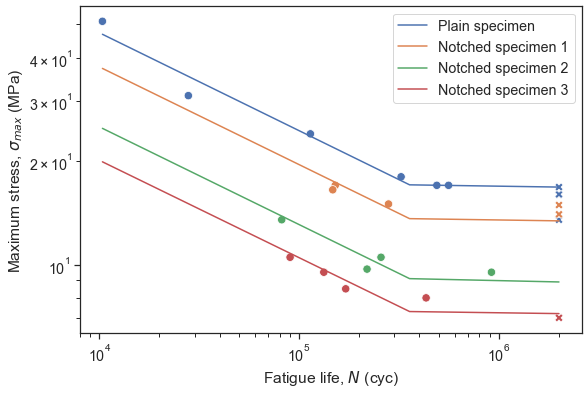

In [29]:
sns.set(font_scale=1.3)
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(9, 6))
ax.set(xscale="log", yscale="log")

# Fatigue scatter plot
sns.scatterplot(x=Fatigue_data['N_cyc'], y=Fatigue_data['S_max_MPa'], hue=np.array(Fatigue_data['label']), 
               style=np.array(Fatigue_data['Result']), s=70, legend=False)

# Predicted fatigue curves using the Point Method
sns.lineplot(x=reshaped_tab_3['N_cyc'], y=reshaped_tab_3['S_pr_PM_MPa'], hue=np.array(reshaped_tab_3['label']))

plt.xlabel("Fatigue life, $N$ (cyc)")
plt.ylabel("Maximum stress, $σ_{max}$ (MPa)")

**Predicted fatigue curves using the Line Method:**

Text(0, 0.5, 'Maximum stress, $σ_{max}$ (MPa)')

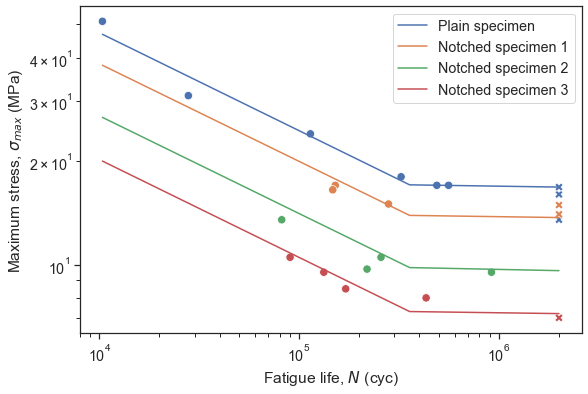

In [30]:
sns.set(font_scale=1.3)
sns.set_style("ticks")
f, ax = plt.subplots(figsize=(9, 6))
ax.set(xscale="log", yscale="log")

# Fatigue scatter plot
sns.scatterplot(x=Fatigue_data['N_cyc'], y=Fatigue_data['S_max_MPa'], hue=np.array(Fatigue_data['label']), 
               style=np.array(Fatigue_data['Result']), s=70, legend=False)

# Predicted fatigue curves using the Line Method
sns.lineplot(x=reshaped_tab_3['N_cyc'], y=reshaped_tab_3['S_pr_LM_MPa'], hue=np.array(reshaped_tab_3['label']))

plt.xlabel("Fatigue life, $N$ (cyc)")
plt.ylabel("Maximum stress, $σ_{max}$ (MPa)")